In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

**Load Data Set**

In [13]:
data = pd.read_csv('./dataset/tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [14]:
data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play        14 non-null object
dtypes: bool(1), object(4)
memory usage: 542.0+ bytes


In [16]:
data.outlook.unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [17]:
data.outlook.value_counts()

rainy       5
sunny       5
overcast    4
Name: outlook, dtype: int64

In [18]:
data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

# Outlook vs Play

In [19]:
group = data[['outlook','play']].groupby(by=['outlook'])

In [20]:
group.count()

,play
outlook,
overcast,4
rainy,5
sunny,5


In [21]:
table = pd.crosstab(data['play'],columns=data['outlook'])
table

outlook,overcast,rainy,sunny
play,,,
no,0,2,3
yes,4,3,2


In [22]:
table.loc['total'] = table.loc['no'] + table.loc['yes']
table['total'] = table['overcast'] + table['rainy']  + table['sunny']

# Pivot Table

In [23]:
table

outlook,overcast,rainy,sunny,total
play,,,,
no,0,2,3,5
yes,4,3,2,9
total,4,5,5,14


# Contingency Table

In [24]:
prob = table.div(14)# table.div(len(data)), table.div(table.iloc[-1,-1])
prob

outlook,overcast,rainy,sunny,total
play,,,,
no,0.000000,0.142857,0.214286,0.357143
yes,0.285714,0.214286,0.142857,0.642857
total,0.285714,0.357143,0.357143,1.000000


##  Marginal Probability:
- $P(overcast)$
- $P(rainy)$
- $P(sunny)$

In [32]:
prob['overcast'].total

0.2857142857142857

In [9]:
# P(overcast)
p_o = prob['overcast'].total
# P(rainy)
p_r = prob['rainy'].total
# P(sunny)
p_s = prob['sunny'].total


In [10]:
# print
print('Probability of overcast: P(overcast) = %0.3f'%p_o )
print('Probability of rainy: P(rainy) = %0.3f'%p_r )
print('Probability of sunny: P(sunny) = %0.3f'%p_s )

Probability of overcast: P(overcast) = 0.286
Probability of rainy: P(rainy) = 0.357
Probability of sunny: P(sunny) = 0.357


##  Marginal Probability:
- $P(no)$
- $P(yes)$

In [11]:
# P(no)
p_no = prob.loc['no'].total
# P(yes)
p_yes = prob.loc['yes'].total

In [12]:
# print
print('Probability of No: P(no) = %0.3f'%p_no )
print('Probability of Yes: P(yes) = %0.3f'%p_yes )

Probability of No: P(no) = 0.357
Probability of Yes: P(yes) = 0.643


# Conditionality Probability

# $P(A|B) = \frac{P(A and B)}{P(B)}$
- $P(Sunny | Yes)$
- $P(Sunny | No )$
- $P(Sunny | Yes)$
- $P(Sunny | No )$


>  Working on how to compute conditional probability

In [13]:
prob

outlook,overcast,rainy,sunny,total
play,,,,
no,0.000000,0.142857,0.214286,0.357143
yes,0.285714,0.214286,0.142857,0.642857
total,0.285714,0.357143,0.357143,1.000000


In [14]:
prob.keys()

Index(['overcast', 'rainy', 'sunny', 'total'], dtype='object', name='outlook')

In [15]:
prob.index

Index(['no', 'yes', 'total'], dtype='object', name='play')

In [16]:
prob['overcast']['yes'] # joint probability

0.2857142857142857

In [17]:
prob['total']['yes'] # marginal probability

0.6428571428571429

In [18]:
prob['overcast']['total'] # marginal probability

0.2857142857142857

In [33]:
prob # p(rainy and yes)

outlook,overcast,rainy,sunny,total
play,,,,
no,0.000000,0.142857,0.214286,0.357143
yes,0.285714,0.214286,0.142857,0.642857
total,0.285714,0.357143,0.357143,1.000000


In [49]:
def margin(A):
    try:
        p = prob[A][-1]
        print('in try')
        return p
    except:
        p = prob.loc[A][-1]
        print('in except')
        return p

In [51]:
margin('yes')

in except


0.6428571428571429

> 

In [56]:
def jointprob(A,B,table):
    """
    jointprob(A,B) will return probability of combination attribute from 
    contigency table. P(A and B)
    A = column
    B = row
    >>> jointprob(A,B,table)
    
    """
    return table[A][B]#.loc[B]

def marginprob(B,table):
    """
    marginprob(B) will return probability of attribute from 
    contigency table. P(B)
    B = row
    >>> marginprob(B,table)
    
    """
    try:
        return table.loc[B][-1]
    except:
        return table[B][-1]

def conditional(event,given,table):
    """
    conditional(event,given,table)
    """
    return jointprob(event,given,table)/marginprob(given,table)

In [57]:
prob

outlook,overcast,rainy,sunny,total
play,,,,
no,0.000000,0.142857,0.214286,0.357143
yes,0.285714,0.214286,0.142857,0.642857
total,0.285714,0.357143,0.357143,1.000000


In [58]:
p_sunny_given_yes = conditional('sunny','yes',prob)
print('Probability of sunny given yes: P(sunny|yes) = %0.3f'%p_sunny_given_yes)

Probability of sunny given yes: P(sunny|yes) = 0.222


In [59]:
p_sunny_given_no = conditional('sunny','no',prob)
print('Probability of sunny given no: P(sunny|no) = %0.3f'%p_sunny_given_no)

Probability of sunny given no: P(sunny|no) = 0.600


In [60]:
p_overcast_given_yes = conditional('overcast','yes',prob)
print('Probability of overcast given yes: P(overcast|yes) = %0.3f'%p_overcast_given_yes)

Probability of overcast given yes: P(overcast|yes) = 0.444


In [61]:
p_overcast_given_no = conditional('overcast','no',prob)
print('Probability of overcast given no: P(overcast|no) = %0.3f'%p_overcast_given_no)

Probability of overcast given no: P(overcast|no) = 0.000


In [62]:
p_rainy_given_yes = conditional('rainy','yes',prob)
print('Probability of rainy given yes: P(rainy|yes) = %0.3f'%p_rainy_given_yes)

Probability of rainy given yes: P(rainy|yes) = 0.333


In [63]:
p_rainy_given_no = conditional('rainy','no',prob)
print('Probability of rainy given no: P(rainy|no) = %0.3f'%p_rainy_given_no)

Probability of rainy given no: P(rainy|no) = 0.400


# Probability Tree

In [64]:
prob.columns.name

'outlook'

In [66]:
ind1

'P(yes)=0.643'

In [65]:
start = prob.index.name
ind1 = 'P(%s)=%0.3f'%('yes',marginprob('yes',prob))
ind2 = 'P(%s)=%0.3f'%('no',marginprob('no',prob))


# Given index-1 probability of events

event11 = '%s=%0.3f'%('sunny',conditional('sunny','yes',prob))
event12 = '%s=%0.3f'%('overcast',conditional('overcast','yes',prob))
event13 = '%s=%0.3f'%('rainy',conditional('rainy','yes',prob))

# Given index-2 probability of events

event21 = '%s=%0.3f'%('sunny',conditional('sunny','no',prob))
event22 = '%s=%0.3f'%('overcast',conditional('overcast','no',prob))
event23 = '%s=%0.3f'%('rainy',conditional('rainy','no',prob))

In [68]:
drawData = {'from':[start,ind1,ind1,ind1,start,ind2,ind2,ind2],
            'to':[ind1,event11,event12,event13,ind2,event21,event22,event23]}
draw = pd.DataFrame(drawData)
draw

,from,to
0,play,P(yes)=0.643
1,P(yes)=0.643,sunny=0.222
2,P(yes)=0.643,overcast=0.444
3,P(yes)=0.643,rainy=0.333
4,play,P(no)=0.357
5,P(no)=0.357,sunny=0.600
6,P(no)=0.357,overcast=0.000
7,P(no)=0.357,rainy=0.400


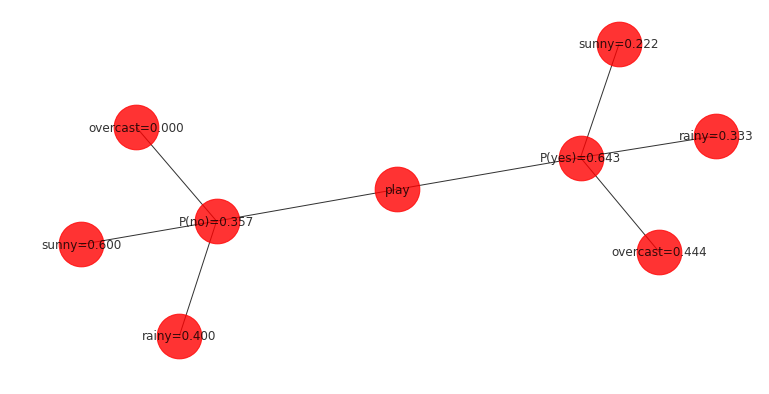

In [74]:
fig = plt.figure(figsize=(10,5))

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(draw, 'from', 'to')

# Make the graph
nx.draw(G, with_labels=True, node_size=2000,alpha=0.8, arrows=True,linewitdh=50.0,cmap=plt.cm.Set1)


#  Classification Report

In [30]:
prob

outlook,overcast,rainy,sunny,total
play,,,,
no,0.000000,0.142857,0.214286,0.357143
yes,0.285714,0.214286,0.142857,0.642857
total,0.285714,0.357143,0.357143,1.000000


# Bayes Theorem
## $P(A | B) = \frac{P(A) * A(B|A)}{P(B)}$
#### Example:
### $P(yes | rainy) = \frac{P(yes) * A(rainy|yes)}{P(rainy)}$

### $= \frac{P(yes) * A(rainy|yes)}{P(yes) * P(rainy|yes) + p(no) * P(rainy|no)}$

In [82]:
def bayes(event,given,table):
    """
                    P(A) * P(B | A)
    P(A | B)  =    _______________
                        P(B)
    >>> bayes(event,given,table)
    """
    
    margin_A = marginprob(event,table) # marginal probability
    cond = conditional(given,event,table) # conditional probability
    margin_B = marginprob(given,table) # marginal probability
    
    return margin_A * cond / margin_B

In [83]:
p_yes_sunny = bayes('yes','sunny',prob)
p_no_sunny = bayes('no','sunny',prob)

p_yes_overcast = bayes('yes','overcast',prob)
p_no_overcast = bayes('no','overcast',prob)

p_yes_rainy = bayes('yes','rainy',prob)
p_no_rainy = bayes('no','rainy',prob)


# Testing with test data

In [84]:
def testGreater(yes,no):
    if yes >= no: return 'yes'
    else: return 'no'

In [85]:
pred = []
for outlook in data['outlook']:
    if outlook == 'sunny':
        pred.append(testGreater(p_yes_sunny,p_no_sunny))
    elif outlook =='overcast':
        pred.append(testGreater(p_yes_overcast,p_no_overcast))
    else:
        pred.append(testGreater(p_yes_rainy,p_no_rainy))

In [87]:
data['outlook_play'] = pd.Series(pred)
data.head(1)

,outlook,temp,humidity,windy,play,outlook_play
0,sunny,hot,high,False,no,no


!pip install pandas_ml

In [89]:
from pandas_ml import ConfusionMatrix

In [90]:
y_true = np.array(list(data['play']))
y_pred = np.array(list(data['outlook_play']))

np.where(y_true == 'yes', True, False), np.where(y_pred == 'yes', True, False)

In [39]:
cm = ConfusionMatrix(np.where(y_true == 'yes', True, False), np.where(y_pred == 'yes', True, False))

In [40]:
cm

Predicted  False  True  __all__
Actual                         
False          3     2        5
True           2     7        9
__all__        5     9       14

In [41]:
print(cm.print_stats())

population: 14
P: 9
N: 5
PositiveTest: 9
NegativeTest: 5
TP: 7
TN: 3
FP: 2
FN: 2
TPR: 0.7777777777777778
TNR: 0.6
PPV: 0.7777777777777778
NPV: 0.6
FPR: 0.4
FDR: 0.2222222222222222
FNR: 0.2222222222222222
ACC: 0.7142857142857143
F1_score: 0.7777777777777778
MCC: 0.37777777777777777
informedness: 0.37777777777777777
markedness: 0.37777777777777777
prevalence: 0.6428571428571429
LRP: 1.9444444444444444
LRN: 0.37037037037037035
DOR: 5.25
FOR: 0.4
None


# Great Job !!!